# Descent Method

## 0. Pre-requisites
The symbol $\mathbb{K}$ stands for the set of all real numbers $\mathbb{R}$ or the set of all complex numbers $\mathbb{C}$.

### 0.1. Symmetric positive-definite matrix
A squared symmetric matrix $A\in\mathbb{R}^{n\times n}$ is said to be positive-definite if
$$\forall x\in\mathbb{R}^n\setminus\left\{0\right\}\quad x^TAx>0.$$
### 0.2. Norm
In a linear space $X$ over $\mathbb{K}$ equipped with a real-valued functional $\left\|\cdot\right\|\colon X\to \mathbb{R}$ which satisfies the following properties:

(i) $\left\|x\right\|\ge 0$, for any $x\in X$ and $\left\|x\right\|=0\iff x=0$;

(ii) $\left\|\alpha x\right\|= \left|\alpha\right|\left\|x\right\|$, for any $x\in X$ and $\alpha\in\mathbb{K}$;

(iii) $\left\|x+y\right\|\le \left\|x\right\|+\left\|y\right\|$, for any $x,y\in X$;

is called normed (linear) space and the functional is said to be a norm of $X$.
### 0.3. Inner product
In a linear space $X$ over $\mathbb{K}$ consider the function $\langle \cdot,\cdot\rangle\colon X\times X\to \mathbb{K}$ that satisfies the following properties:

(I) $\langle x,x\rangle\ge 0$ for any $x\in X$ and $\langle x,x\rangle = 0$ if, and only if $x=0$;

(II) $\langle \alpha x,y\rangle =\alpha \langle x,y\rangle,$ for any $x,y\in\mathbb{X}$ and $\alpha\in\mathbb{K}$;

(III) $\langle x,y\rangle = \overline{\langle y,x\rangle},$ for any $x,y\in X$;

(IV) $\langle x+y,z\rangle = \langle x,z\rangle + \langle y,z\rangle$, for any $x,y,z\in X$.

Under these configurations we call the function $\langle \cdot,\cdot\rangle$ an inner product.

Furthermore it defines a norm on $X$ in the following settings:

$$\forall x\in X\quad \left\|x\right\|=\sqrt{\langle x,x\rangle}.$$

Example: take $x=(x_1,...,x_n),y=(y_1,...,y_n)\in\mathbb{R}^n$. Then
$$\langle x,y\rangle=\sum_{i=1}^nx_iy_i$$
defines the natural inner product in $\mathbb{R}^n$. if we see $x$ and $y$ as columns of dimension $n$, it yields
$$\langle x,y\rangle = y^Tx.$$
In particular,
$$\left\|x\right\|_2=\sqrt{x^Tx}$$
defines a norm in $\mathbb{R}^n$ which is frequently called Euclidean norm as it is just the formula for the distance in ordinary three-dimensional Euclidean space extended to dimension $n$.

Example: Suppose that $A\in\mathbb{R}^{n\times n}$ is a symmetric positive-definite matrix. Then the following bilinear form defines an inner product in $\mathbb{R}^n$:
$$\langle x,y\rangle_{A}=\langle Ax,y\rangle= y^TAx.$$
In particular,
$$\left\|x\right\|=\sqrt{\langle Ax,x\rangle}=\sqrt{x^TAx}$$
is a norm in $\mathbb{R}^n$.

### 0.4. Matrix norm induced by the vector norm
Let $A\in\mathbb{R}^{n\times n}$ be a matrix and let $\left|\cdot\right|\colon \mathbb{R}^n\to \mathbb{R}$ be a norm. Then $\left\|\cdot\right\|\colon \mathbb{R}^{n\times n}\to\mathbb{R}$ given by
$$\left\|A\right\|=\sup_{\left|x\right|=1}\left|Ax\right|$$
defines a norm, which is also said to be a natural norm or matrix norm induced by the vector norm.

### 0.5 Important results
1. Let $A\in\mathbb{R}^{n\times n}$ be a symmetric positive-definite matrix and let $\lambda_1\le \lambda_2\le ...\le \lambda_n$ be the eigen values of $A$ and consider the euclidean norm in $\mathbb{R}^n$,
$$\left\|x\right\|_2=\sqrt{x_1^2+...+x_n^2}.$$
Under these configurations, we have
$$\left\|A\right\|_2=\lambda_n.$$

2. The Cauchy-Schwarz inequality states that, for $x,y\in\mathbb{R}^n$, one has
$$\langle x,y\rangle\le \left\|x\right\|\left\|y\right\|$$
and the equality is attained if $x$ and $y$ are colinear.

## 1. Hypotesis
We are given $n$ samples of $m$ features $(x_{11},x_{12},...,x_{1m}), (x_{21},x_{22},...,x_{2m}),..., (x_{n1},x_{n2},...,x_{nm})\in\mathbb{R}^m$ which assume values of $y_1,y_2,...,y_n\in\mathbb{R}$, respectively. Let us assume that the given dataset is "rich enough" (which will be discussed later), and suppose that the mapping $\boldsymbol{x}\mapsto y$ is "almost" linear. We would like to have the following equalities to be satisfied:
$$\begin{cases}
\theta_0 + \theta_1x_{11}+\theta_2x_{12}+...+\theta_mx_{1m}=y_1 \\
\theta_0 + \theta_1x_{21}+\theta_2x_{22}+...+\theta_mx_{2m}=y_2 \\
\qquad\qquad\qquad\qquad \vdots \\
\theta_0 + \theta_1x_{n1}+\theta_2x_{n2}+...+\theta_mx_{nm}=y_n
\end{cases}$$
which is represented matricially as
$$\begin{bmatrix}
1&x_{11}&x_{12}&\dots&x_{1m}\\
1&x_{21}&x_{22}&\dots&x_{2m}\\
\vdots &\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&x_{n2}&\dots&x_{nm}\\
\end{bmatrix}
\begin{bmatrix}
\theta_0\\\theta_1\\ \vdots \\ \theta_m
\end{bmatrix}=\begin{bmatrix}y_1\\y_2\\\vdots\\ y_n\end{bmatrix}.
$$
So we'd have to solve the system of linear equations $\begin{bmatrix}\boldsymbol{1}&\boldsymbol{X}\end{bmatrix}\boldsymbol\theta=\boldsymbol{y}$, for unknown $\boldsymbol\theta$. If it has a solution $\boldsymbol\theta=(\theta_0,\theta_1,...,\theta_m)$, then the graph function of $y\colon \mathbb{R}^m\to \mathbb{R}$, $y(x_1,...,x_m)=\theta_0 + \theta_1x_1+...+\theta_mx_m$, which is $G_y\colon \mathbb{R}^{m}\mapsto\mathbb{R}^{m+1}$, $\boldsymbol{x}\mapsto (\boldsymbol{x}, y(\boldsymbol{x}))$ passes through all the given points. This is a interpolation problem, which is not of our interest.

For our purpose, we assume that $m\ll n$ and that the training matrix with intercept has full column rank. In other words, we must not have perfect multicolinearity. By all this we mean that the dataset is "rich enough". In this conformity there would not be a solution for the linear equation, but rather a good approximation "solution". In fact, for any given $\boldsymbol\theta$ there is some $\boldsymbol\varepsilon = (\varepsilon_1,...,\varepsilon_n)$, such that
$$\begin{bmatrix}\boldsymbol{1}&\boldsymbol{X}\end{bmatrix}\boldsymbol\theta+\boldsymbol\varepsilon=\boldsymbol{y}.$$
So then the aim is to find $\boldsymbol{\theta}$ such that $\boldsymbol{\varepsilon}$ in length is as small as possible. In other words, we tend to find the minimizer (if it exists) of the functional
$$J(\boldsymbol\theta)=\left\|\boldsymbol{A}\boldsymbol\theta-\boldsymbol{y}\right\|^2_2,$$
where $\boldsymbol{A}=\begin{bmatrix}\boldsymbol{1}&\boldsymbol{X}\end{bmatrix}$.

## 2. Equivalent problem
Suppose that $A\in \mathbb{R}^{n\times p}$ and $b\in\mathbb{R}^n$ with $\text{r}(A)=p$. The minimization problem of $$x\mapsto J(x)=\frac{1}{2}\left\|Ax-b\right\|_2^2$$ is equivalent to solving the following linear (normal) equation: $$A^TAx=A^Tb.$$ In other words, the unique solution of the normal equation is also the unique minimizer of $J$.

Sketch of proof: The stacionary point of $J$ is $x$, one that yields $\nabla J(x)=0$, that is $A^T(Ax-b)=0$, which is equivalent to $A^TAx=A^Tb$. This is indeed the unique minimizer, since the Hessian matrix of $J$ is $H_J=A^TA$ which is positive-definite, whence also invertible.

So, considering $A_{\text{new}}={A_{\text{old}}}^TA_{\text{old}}$ and $b_{\text{new}}={A_{\text{old}}}^Tb_{\text{old}}$, it all reduces to solving the following linear equation:
$$Ax=b,$$
where $A\in\mathbb{R}^{p\times p}$ is (symmetric) positive-definite.

## 3. Descent Method with optimal step
Suppose that $u$ satisfies the linear equation $Ax=b$. Since $A$ is positive-definite by assumption, $u$ is the unique vector that annihilates the quadratic functional $E\colon \mathbb{R}^p\to \mathbb{R}$ given by the canonical inner product
$$
E(x)=\langle A(x-u),x-u\rangle \ge 0.
$$
Consider the following algorithm:
$$
\begin{cases}
u^0\quad\text{fixed}\\
u^{k+1}=u^k-\rho^kd^k& k=0,1,2,...
\end{cases}
$$
where we choose the direction of the descent $d^k$ on each iteration.

Idea: Knowing $u^k$ and choosing $d^k$, how to attain $\rho^k$?

Answer: $E(u^k-\rho^kd^k)=\min_{\rho\in\mathbb{R}}E(u^k-\rho d^k)$.

Computations:

$E(u^k-\rho d^k)=\langle A(u^k-\rho d^k-u),u^k-\rho d^k-u\rangle = \langle A(u^k-u),u^k-u \rangle - \rho\langle Ad^k,u^k-u\rangle - \rho\langle A(u^k-u),d^k \rangle + \rho^2\langle A d^k,d^k\rangle = E(u^k)-2\rho\langle A(u^k-u),d^k\rangle+\rho^2 \langle A d^k,d^k\rangle.$

By considering the residual term $r^k = Au^k-b$, we arrive at the following equality:
$$E(u^k-\rho d^k)=E(u^k)-2\rho\langle r^k,d^k\rangle+\rho^2 \langle A d^k,d^k\rangle.$$
We then recognize the quadratic polynomial $\alpha+\rho\beta+\rho^2\gamma$ with the leading factor $\gamma = \langle A d^k,d^k\rangle>0$, and so the minimum is attained at 
$$\rho=-\frac{\beta}{2\gamma}=\frac{\langle r^k,d^k\rangle}{\langle A d^k,d^k\rangle}.$$

Notice that indeed we have
$$E(u^{k+1})=E(u^k-\rho^k d^k)=E(u^k)-\frac{\langle r^k,d^k\rangle^2}{\langle A d^k,d^k\rangle}\le E(u^k).$$

### 3.1. Convergence
Our goal is to show then, that $u^k\to u$ as $k\to\infty$. It is sufficient to check if $$\lim_{k\to\infty}E(u^k)=0.$$

Notice that
$$r^k=Au^k-b=A(u^k-u)\implies u^k-u=A^{-1}r^k$$
from which we have
$$E(u^k)=\langle A(u^k-u),u^k-u \rangle = \langle r^k,A^{-1}r^k\rangle .$$
But
$$E(u^{k+1})=E(u^k)-\frac{\langle r^k,d^k\rangle^2}{\langle A d^k,d^k\rangle}=E(u^k)\left[1-\frac{\langle r^k,d^k\rangle^2}{E(u^k)\langle A d^k,d^k\rangle}\right].$$
Our purpose is to limit above the expression in the right parentesis by a number smaller than $1$. In this conformity, recall that the Cauchy-Schwarz inequality yields:
$$\langle Ad^k,d^k\rangle \le\lambda_n \left\|d^k\right\|_2^2\quad\text{and}\quad \langle r^k,A^{-1}r^k\rangle\le \frac{1}{\lambda_1}\left\|r^k\right\|_2^2,$$
where $\lambda_1\le \lambda_2\le ...\le \lambda_n$ are the eigen values of $A$. So we therefore have
$$\langle Ad^k,d^k\rangle\langle r^k,A^{-1}r^k\rangle \le \underbrace{\frac{\lambda_n}{\lambda_1}}_{\kappa_2(A)}\left\|d^k\right\|_2^2\left\|r^k\right\|_2^2,$$
where $\kappa_2(A):=\left\|A\right\|_2\left\|A^{-1}\right\|_2$ is the condition number of $A$. The above inequality is equivalent to
$$
-\frac{1}{\langle Ad^k,d^k\rangle\langle r^k,A^{-1}r^k\rangle}\le -\frac{1}{\kappa_2(A)\left\|d^k\right\|_2^2\left\|r^k\right\|_2^2},
$$
and so
$$
E(u^{k+1})\le E(u^k)\left[1-\frac{\langle r^k,d^k\rangle^2}{\kappa_2(A)\left\|d^k\right\|_2^2\left\|r^k\right\|_2^2}\right]=E(u^k)\left[1-\frac{1}{\kappa_2(A)}\left<\frac{r^k}{\left\|r^k\right\|_2},\frac{d^k}{\left\|d^k\right\|_2}\right>^2\right].
$$
Let us assume that $$0<\mu\le \left<\frac{r^k}{\left\|r^k\right\|_2},\frac{d^k}{\left\|d^k\right\|_2}\right>^2.$$
Notice that
$$I=AA^{-1}\implies 1=\left\|I\right\|\le \left\|A\right\|\left\|A^{-1}\right\|=\kappa(A)\implies \frac{1}{\kappa(A)}\le 1.$$
So, the inequality
$$0<\frac{\mu}{\kappa_2(A)}\le \frac{1}{\kappa_2(A)}\left<\frac{r^k}{\left\|r^k\right\|_2},\frac{d^k}{\left\|d^k\right\|_2}\right>^2$$
leads to
$$1>1-\frac{\mu}{\kappa_2(A)}\ge 1-\frac{1}{\kappa_2(A)}\left<\frac{r^k}{\left\|r^k\right\|_2},\frac{d^k}{\left\|d^k\right\|_2}\right>^2.$$
It yields the following relation
$$E(u^{k+1})\le E(u^k)\left[1-\frac{\mu}{\kappa_2(A)}\right].$$
Whence
$$E(u^{k+1})\le E(u^0)\left[1-\frac{\mu}{\kappa_2(A)}\right]^{k+1}\to 0$$
as $k\to\infty$.

### 3.2. The Algorithm
We proved the following.
Given $A\in\mathbb{R}^p$ symmetric positive-definite matrix, $b\in\mathbb{R}^p$ and choose $u_0\in\mathbb{R}^p$. Let $$u^{k+1}=u^k-\rho^kd^k,$$ for chosen $d^k\in\mathbb{R}^p$, $$r^k=Au^k-b$$ and $$\rho^k=\frac{\langle r^k,d^k\rangle}{\langle Ad^k,d^k\rangle},$$ for any $k\in\mathbb{N}$. Let $E\colon \mathbb{R}^p\to \mathbb{R}$ be the quadratic functional
$$E(x)=\langle A(x-u),x-u\rangle,\quad x\in\mathbb{R}^p$$
and $\mu$ be a real number such that
$$0<\mu\le \left<\frac{r^k}{\left\|r^k\right\|_2},\frac{d^k}{\left\|d^k\right\|_2}\right>^2,$$
for any $k\in\mathbb{N}$. Then
$$\lim_{k\to\infty}u^k=u$$
and $u$ is the unique solution to the system of linear equations $Ax=b$.

We will make the following choices: Choose $u^0=\boldsymbol{0}$, and the direction of descent $d^k$ to be chosen cyclically $e_1,e_2,...,e_p,e_1,e_2,...,e_p,...$, where
$e_i=(0,...,\underset{i\text{-th entry}}{1},...,0)$. Note that we would like to have $\mu>0$ such that
$$
\frac{\left|r^k_i\right|^2}{\left\|r^k\right\|^2}>\mu,
$$
where $r^k_i$ is the $i$-th entry of $r^k$. If, for some reason the above inequality doesn't happen, we can skip to the next descent direction. In fact, at least one of the direction will satisfy the above inequality. To prove it, suppose the contrary, i.e., for any $i=1,...,p$ one has
$$\frac{\left|r^k_i\right|^2}{\left\|r^k\right\|^2}\le\mu.$$
We therefore sum over all the $i$ and achieve $1\le p\mu$. But, since we can choose $\mu$ to be less than $p$, it yields a contradiction. So the algorithm works fine and we don't need to worry about the choice of $\mu$.

Recall that
$$r^{k+1}=Au^{k+1}-b=A(u^k-\rho^kd^k)-b=Au^k-b-\rho^k Ad^k=r^k-\rho^k Ad^k.$$

### 3.3. Implementation of the Algorithm

In [1]:
from typing import Any
import numpy as np

class DescentMethod1:
    def __init__(self, fit_intercept: bool = True) -> None:
        self.fit_intercept = fit_intercept # This attribute is used in the fit method to determine if we need to add a column of ones to the input
        self.theta = np.ndarray([]) # The learned parameters will be stored here
        self.intercept_ = 0 # The intercept term will be stored here
        self.coef_ = np.ndarray([]) # The coefficients will be stored here (excluding the intercept term)

    def fit(self, X, y, epsilon = 1e-5) -> None:
        """
        Fit the linear regression model using the descent method with optimal step.

        Parameters:
        X (numpy.ndarray): Input features of shape (n_samples, m_features)
        y (numpy.ndarray): Target values of shape (n_samples,)
        epsilon (float): the maximum error that we are allowed to commit
        """
        n_samples, = y.shape # dimension of our sample
        y = np.reshape(y, newshape=(n_samples, 1)) # making sure it is a column matrix of dimension n_samples
        if self.fit_intercept:
            X = np.column_stack((np.ones(X.shape[0]), X))

        A = X.T @ X
        if np.linalg.det(A) == 0: # This condition is to make sure that A is positive-definite
            raise ValueError("X is not rich enough.")
        b = X.T @ y
        p = A.shape[0] # dimension of square matrix A
        u = np.zeros((p,1)) # u^0 fixed to be p-dimensional column of 0s
        r = A @ u - b # r^0 fixed
        I = np.identity(p) # matrix of direction columns
        i = 0 # i-th direction
        k = 0 # number of iterations

        while bool(r.T @ r >= epsilon):
            if r[i] == 0:
                i = (i + 1) % p
                continue
            d = I[i].reshape((p,1)) # current direction of descent
            rho = r[i,0] / A[i,i] # current optimal step
            u = u - rho * d # updating u
            r = r - rho * A @ d # updating residual term
            k = k + 1
            i = (i + 1) % p
        self.theta = u

        print(f'Theta shape: {self.theta.shape}')
        self.intercept_ = self.theta[0]
        print(f'Intercept: {self.intercept_}')
        self.coef_ = self.theta[1:].reshape(-1)
        print(f'Coefficients: {self.coef_}')
        print(f'Number of iterations: {k}')


        # Ensure coef_ is 1-dimensional
        self.coef_ = self.coef_.ravel()
    
    def predict(self, X) -> np.ndarray[Any, Any] | Any:
        """
        Predict target values for the input features.

        Parameters:
        X (numpy.ndarray): Input features of shape (n_samples, m_features)

        Returns:
        numpy.ndarray: Predicted target values
        """
        if self.theta is None:
            raise ValueError("Model has not been fitted. Call fit() first.")

        if self.fit_intercept:
            X = np.column_stack((np.ones(X.shape[0]), X))
        return X @ self.theta

    def score(self, X, y) -> float:
        """
        Calculate the R-squared (R^2) score of the model.

        Parameters:
        X (numpy.ndarray): Input features of shape (n_samples, m_features)
        y (numpy.ndarray): True target values of shape (n_samples,)

        Returns:
        float: R-squared score
        """
        y_pred = self.predict(X).reshape(-1)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def get_params(self) -> dict[str, Any]:
        """
        Get the model's parameters.

        Returns:
        --------
        - dict: A dictionary containing the model's parameters
        """
        return {
            'fit_intercept': self.fit_intercept,
            'theta': self.theta,
            'intercept_': self.intercept_,
            'coef_': self.coef_
        }

    def __repr__(self) -> str:
        """
        Return a string representation of the DescentMethod1 model.
        """
        return f"DescentMethod1(fit_intercept={self.fit_intercept})"

### 3.4. Testing the code with dummy data

In [2]:
np.random.seed(1)

n = 70 # number of samples -- PARAMETER
m = 2 # number of features (dimension)

X = np.random.random(size=(n,m)) * 10

# z = ax_1 + bx_2 + epsilon, onde epsilon segue distribuicao normal
eps = np.random.normal(2,1.5,n)
c = np.array([-.4,.6])
y = np.array([np.dot(c, X[i,:]) for i in range(n)]) + eps

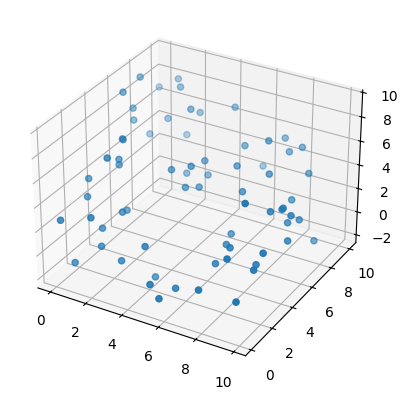

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=X[:,0], ys=X[:,1], zs=y)
plt.show()

In [4]:
modelu = DescentMethod1()
modelu.fit(X, y)
model_scoring = modelu.score(X,y)
print(f'\nR-squared: {round(model_scoring, 3)}')

Theta shape: (3, 1)
Intercept: [1.82936314]
Coefficients: [-0.43056531  0.67833865]
Number of iterations: 124

R-squared: 0.707


In [5]:
import plotly.graph_objects as go

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(xs=X[:,0], ys=X[:,1], zs=y, color='red')
# ax.plot_trisurf(X[:,0], X[:,1], y_predict.reshape(-1), alpha=0.7, color='blue')


x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
XX = np.column_stack([X1.ravel(),X2.ravel()])
y_predicted = modelu.predict(XX).reshape(X1.shape)
fig = go.Figure(
    data = [
        go.Scatter3d(
            x=X[:, 0], 
            y=X[:, 1], 
            z=y, 
            mode='markers',
            marker=dict(size=5, color='blue', opacity=0.8),
            name='Original Data'
        ),
        go.Surface(
            x=X1, 
            y=X2, 
            z=y_predicted, 
            colorscale='Viridis', 
            opacity=0.7,
            name='Model'
        )
    ]
)

# Configurar el diseño del gráfico
fig.update_layout(
    title='3D Graph: Original vs Model',
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='y'
    ),
    width=1400,
    height=700,
    margin=dict(r=10, b=5, l=5, t=20)
)

# Agregar leyenda
fig.update_layout(legend=dict(
    y=0.99,
    x=0.01
))

# Mostrar el gráfico
fig.show()

### 3.5. Bonus (Gradient Descent)

Let us see how the algorithm behaves with the same data when we choose the descent direction to be the gradient, i.e., $$d^k=r^k=Au^k-b.$$

In [6]:
# from typing import Any
# import numpy as np

class GradientMethod:
    def __init__(self, fit_intercept: bool = True) -> None:
        self.fit_intercept = fit_intercept # This attribute is used in the fit method to determine if we need to add a column of ones to the input
        self.theta = np.ndarray([]) # The learned parameters will be stored here
        self.intercept_ = 0 # The intercept term will be stored here
        self.coef_ = np.ndarray([]) # The coefficients will be stored here (excluding the intercept term)

    def fit(self, X, y, epsilon = 1e-5) -> None:
        """
        Fit the linear regression model using the gadient descent method with optimal step.

        Parameters:
        X (numpy.ndarray): Input features of shape (n_samples, m_features)
        y (numpy.ndarray): Target values of shape (n_samples,)
        epsilon (float): the maximum error that we are allowed to commit
        """
        n_samples, = y.shape # dimension of our sample
        y = np.reshape(y, newshape=(n_samples, 1)) # making sure it is a column matrix of dimension n_samples
        if self.fit_intercept:
            X = np.column_stack((np.ones(X.shape[0]), X))

        A = X.T @ X
        if np.linalg.det(A) == 0: # This condition is to make sure that A is positive-definite
            raise ValueError("X is not rich enough.")
        b = X.T @ y # 
        p = A.shape[0] # dimension of square matrix A
        u = np.zeros((p,1)) # u^0 fixed to be p-dimensional column of 0s
        r = A @ u - b # r^0 fixed
        k = 0 # number of iterations

        while bool(r.T @ r >= epsilon):
            num = (r.T @ r).item()
            dnm = ((A @ r).T @ r).item()
            rho = num / dnm # current optimal step
            u = u - rho * r # updating u
            r = r - rho * A @ r # updating residual term
            k = k + 1
        self.theta = u

        print(f'Theta shape: {self.theta.shape}')
        self.intercept_ = self.theta[0]
        print(f'Intercept: {self.intercept_}')
        self.coef_ = self.theta[1:].reshape(-1)
        print(f'Coefficients: {self.coef_}')
        print(f'Number of iterations: {k}')
        print(f'Condition number: {np.linalg.cond(A)}')


        # Ensure coef_ is 1-dimensional
        self.coef_ = self.coef_.ravel()
    
    def predict(self, X) -> np.ndarray[Any, Any] | Any:
        """
        Predict target values for the input features.

        Parameters:
        X (numpy.ndarray): Input features of shape (n_samples, m_features)

        Returns:
        numpy.ndarray: Predicted target values
        """
        if self.theta is None:
            raise ValueError("Model has not been fitted. Call fit() first.")

        if self.fit_intercept:
            X = np.column_stack((np.ones(X.shape[0]), X))
        return X @ self.theta

    def score(self, X, y) -> float:
        """
        Calculate the R-squared (R^2) score of the model.

        Parameters:
        X (numpy.ndarray): Input features of shape (n_samples, m_features)
        y (numpy.ndarray): True target values of shape (n_samples,)

        Returns:
        float: R-squared score
        """
        y_pred = self.predict(X).reshape(-1)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def get_params(self) -> dict[str, Any]:
        """
        Get the model's parameters.

        Returns:
        --------
        - dict: A dictionary containing the model's parameters
        """
        return {
            'fit_intercept': self.fit_intercept,
            'theta': self.theta,
            'intercept_': self.intercept_,
            'coef_': self.coef_
        }

    def __repr__(self) -> str:
        """
        Return a string representation of the GradientMethod model.
        """
        return f"GradientMethod(fit_intercept={self.fit_intercept})"

In [7]:
# Testing out the Gradient Descent Method
modely = GradientMethod()
modely.fit(X,y)
model_scoring = modelu.score(X,y)
print(f'\nR-squared: {round(model_scoring, 3)}')

Theta shape: (3, 1)
Intercept: [1.82912777]
Coefficients: [-0.43054717  0.67835983]
Number of iterations: 823
Condition number: 378.56840455432916

R-squared: 0.707


So what is actually happening? Intuitively, we expect the gradient descent to perform better than the pervious method, because we are always descending in the optimal direction, right? So what is preventing the later method to converge faster?

Hint: Condition number.